**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**About Data**:
    
    Product Purchased:	KP281, KP481, or KP781
    Age:	              In years
    Gender:	           Male/Female
    Education:	        In years
    MaritalStatus:	    Single or partnered
    Usage:	            The average number of times the customer plans to use the treadmill each week.
    Income:	           Annual income (in USD)
    Fitness:	          Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
    Miles:	            The average number of miles the customer expects to walk/run each week

**Product Portfolio:**
    
    The KP281 is an entry-level treadmill that sells for 1,500 USD.
    The KP481 is for mid-level runners that sell for 1,750 USD.
    The KP781 treadmill is having advanced features that sell for 2,500 USD.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aero=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
aero.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [2]:
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


From above data infomation we can be sure that the columns Usage and Fitness columns are also Catgorical.

In [3]:
aero['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [4]:
aero['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [5]:
aero['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [6]:
aero['Usage']=aero['Usage'].astype('str')
aero['Fitness']=aero['Fitness'].astype('str')
aero['Education']=aero['Education'].astype('str')
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    object
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 12.8+ KB


**Univariate Analysis:**

**Product:**

In [7]:
aero['Product'].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

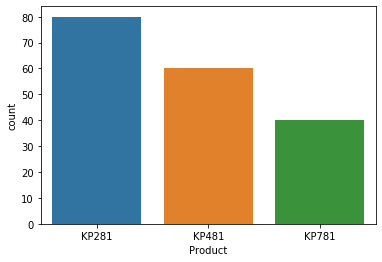

In [8]:
sns.countplot(x=aero['Product'])
plt.show()

From above we can see that:

    Nearly 44% or 80 members of our Buyers are Buying product `KP281`.
    Nearly 33% or 60 members of our Buyers are Buying product `KP481`.
    Nearly 22% or 40 members of our Buyers are Buying product `KP781`.

**Age**

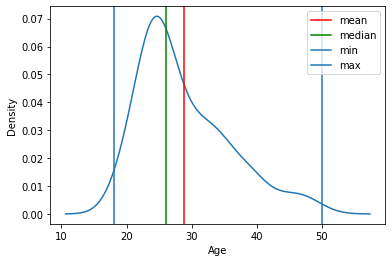

In [9]:
sns.kdeplot(aero['Age'])
plt.axvline(np.mean(aero['Age']),c='r',label='mean')
plt.axvline(np.median(aero['Age']),c='g',label='median')
plt.axvline(np.min(aero['Age']),label='min')
plt.axvline(np.max(aero['Age']),label='max')
plt.legend()
plt.show()

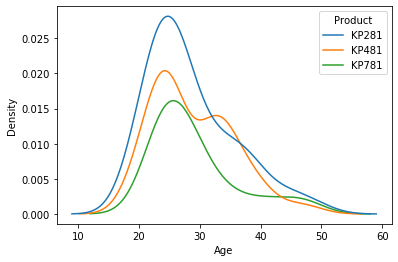

In [10]:
sns.kdeplot(data=aero,x='Age',hue='Product')
plt.show()

In [11]:
aero['Age'].min()

18

In [12]:
aero['Age'].max()

50

Since, Age is a continous variable, We can create `Age_cat` a categorical variable

In [13]:
aero['Age_cat']=pd.cut(aero['Age'], bins=[18,22,26,30,34,38,42,46,50], labels=['18-21','22-25','26-29','30-33','34-37','38-41','42-45','46-50'],ordered=False)
aero['Age_cat'].value_counts()

22-25    67
26-29    29
30-33    24
18-21    23
34-37    18
38-41     8
42-45     5
46-50     5
Name: Age_cat, dtype: int64

In [14]:
aero[aero['Age']==50]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat
79,KP281,50,Female,16,Partnered,3,3,64809,66,46-50


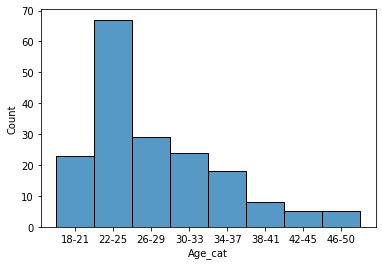

In [15]:
sns.histplot(aero['Age_cat'])
plt.show()

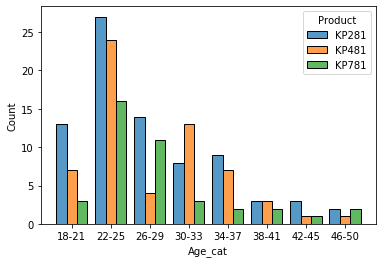

In [16]:
sns.histplot(data=aero, x='Age_cat', hue='Product', multiple='dodge',shrink=.8)
plt.show()

In [17]:
np.mean(aero['Age'])-np.median(aero['Age'])

2.788888888888888

From above Graph we can see that:

    Most of our buyers are concentrated on 22-25 Years range.
    We can also median<mean for Given data by 3(approx).

**Gender**

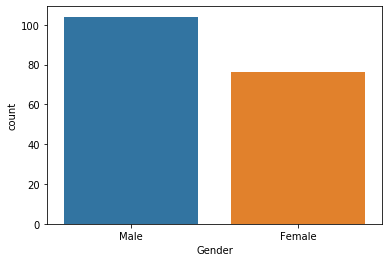

In [70]:
sns.countplot(x=aero['Gender'])
plt.show()

In [71]:
aero['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

From above we can see that:

    There are nearly (3/4)th Females when compared to the number of Males Present.

**Education**

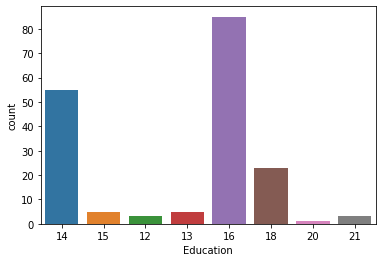

In [18]:
sns.countplot(x=aero['Education'])
plt.show()

In [19]:
aero['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

From Above Graph:

    We can see that People who have `16` years of Education has bought most of the products.
    Hence we can see that we have `Graduates` as most of our Buyers.
    We can also see that People who have `20` Years of Educations are the people who have brought the least of our customers.

**MaritalStatus**

In [20]:
aero['MaritalStatus'].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

In [21]:
aero['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

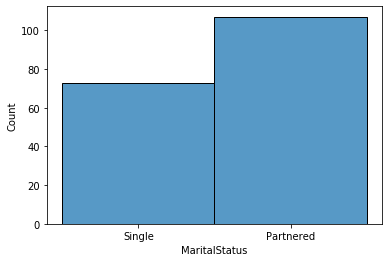

In [22]:
sns.histplot(data=aero, x='MaritalStatus')

From Above Graph:

    We can see that nearly `41%` of our buyers are single.
    We can also see that nearly `59%` of our buyers are Partnered.

**Usage**

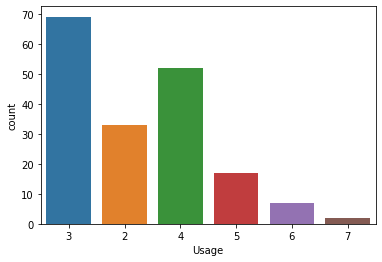

In [23]:
sns.countplot(x=aero['Usage'])
plt.show()

From Above:

    We can see that most of the people are working out only 3 days a week.
    Least number of people are working out 7 days a week.

**Fitness**

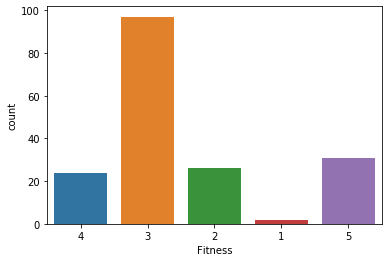

In [24]:
sns.countplot(x=aero['Fitness'])
plt.show()

From above:
    
    We can see that most people has an average fitness of 3
    Least people have fitness of lowest amount of 1

**Income**

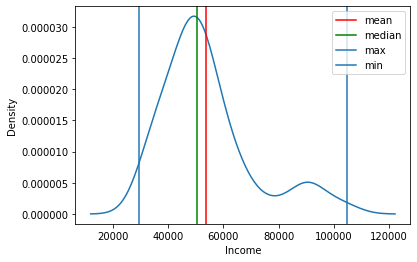

In [25]:
sns.kdeplot(aero['Income'])
plt.axvline(np.mean(aero['Income']),color='r', label='mean')
plt.axvline(np.median(aero['Income']),color='g', label='median')
plt.axvline(np.max(aero['Income']), label='max')
plt.axvline(np.min(aero['Income']), label='min')
plt.legend()
plt.show()

In [26]:
aero['Income'].min()

29562

In [27]:
aero['Income'].max()

104581

In [28]:
aero['Income_cat']=pd.cut(aero['Income'],bins=[20000,40000,60000,80000,100000,120000], labels=['20K-40K','40K-60K','60K-80K','80K-100K','100K-120K'])
aero['Income_cat'].value_counts()

40K-60K      106
20K-40K       32
60K-80K       23
80K-100K      16
100K-120K      3
Name: Income_cat, dtype: int64

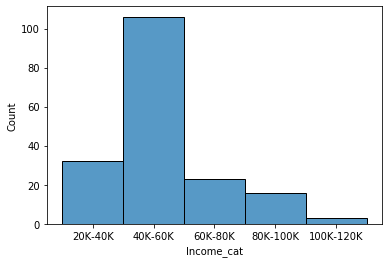

In [29]:
sns.histplot(data=aero['Income_cat'])
plt.show()

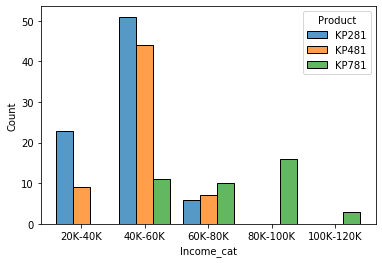

In [30]:
sns.histplot(data=aero, x='Income_cat', hue='Product', multiple='dodge', shrink=.8)
plt.show()

In [31]:
np.mean(aero['Income'])-np.median(aero['Income'])

3123.0777777777766

From above we can see that:

    Most of our Buyers are in range of `40K-60K` Income Range.
    As the salary increases our Buyers are decreasing.
    As the salary increases The Buyers who are buying the product `KP781`
    The Buyers with salary range of `40K-60K` are the highest among the buyers who bought `Kp481`

**Miles**

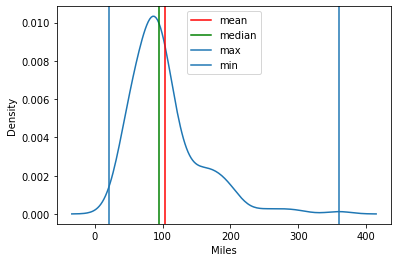

In [32]:
sns.kdeplot(aero['Miles'])
plt.axvline(np.mean(aero['Miles']),color='r', label='mean')
plt.axvline(np.median(aero['Miles']),color='g', label='median')
plt.axvline(np.max(aero['Miles']), label='max')
plt.axvline(np.min(aero['Miles']), label='min')
plt.legend()
plt.show()

In [33]:
np.mean(aero['Miles'])-np.median(aero['Miles'])

9.194444444444443

In [34]:
aero['Miles_cat']=pd.cut(aero['Miles'],bins=[0,100,200,300,400], labels=['0-100','100-200','200-300','300-400'])
aero['Miles_cat'].value_counts()

0-100      114
100-200     60
200-300      5
300-400      1
Name: Miles_cat, dtype: int64

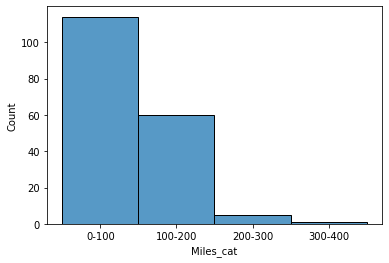

In [35]:
sns.histplot(aero['Miles_cat'])
plt.show()

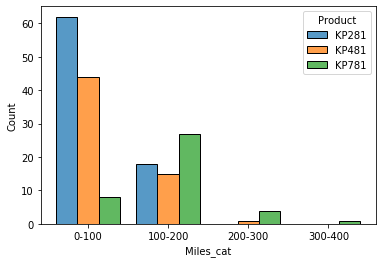

In [36]:
sns.histplot(data=aero, x='Miles_cat', hue='Product', multiple='dodge', shrink=0.8)
plt.show()

From above we can see that:

    The product `KP281` usage is more in `0-100` Miles range.
    The product `KP781` usage is prresent in Higher Miles Range.

**BiVariate Analysis**:

In [37]:
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    object  
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    object  
 6   Fitness        180 non-null    object  
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Age_cat        179 non-null    category
 10  Income_cat     180 non-null    category
 11  Miles_cat      180 non-null    category
dtypes: category(3), int64(3), object(6)
memory usage: 14.1+ KB


**Product V/s Age:**

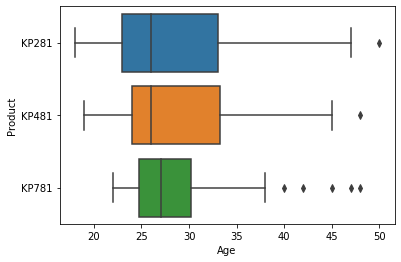

In [38]:
sns.boxplot(data=aero, x='Age', y='Product')
plt.show()

From Above we can see that:

    Product `KP281` has least number of Outliers, followed by Product `KP481`.
    Product `KP781` has Max number of Outliers.

In [39]:
for i in aero['Product'].unique():
  print(i, aero[aero['Product']==i].Age.max())

KP281 50
KP481 48
KP781 48


From Above:

    We can see that the max age of people who bought `KP281` is highest among all other products

In [40]:
for i in aero['Product'].unique():
  print(i, aero[aero['Product']==i].Age.min())

KP281 18
KP481 19
KP781 22


From Above:

    We can see that people who bought product `KP281` are younger.

In [41]:
for i in aero['Product'].unique():
  print(i, aero[aero['Product']==i].Age.median())

KP281 26.0
KP481 26.0
KP781 27.0


From Above:

    We can see that median age of people who brought product `KP781` is higher.

In [42]:
for i in aero['Product'].unique():
  print(i, aero[aero['Product']==i].Age.mean())

KP281 28.55
KP481 28.9
KP781 29.1


From Above:

    We can see that average age of people who brought product `KP791` is Higher.

In [43]:
for i in aero['Product'].unique():
  print(i, aero[aero['Product']==i].Age.mode()[0])

KP281 23
KP481 25
KP781 25


From Above:

    We can see that more number of people who bought product `KP281` is 23 Years old.
    We can see that more number of people who bought product `KP481` is 25 Years old.
    We can see that more number of people who bought product `KP781` is 25 Years old.
    

In [44]:
n=aero['Age'].mean()
m=aero['Age'].median()
float(n)-float(m)

2.788888888888888

**Product V/s Gender:**

In [45]:
pd.crosstab(aero['Product'], aero['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [46]:
pd.crosstab(aero['Product'], aero['Gender'],normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


From above we can see that:

    The number of Males and Females who brought the Product `KP281` is same.
    The Female users decrease as the Product Advances, whereas number of Male users increase.

In [73]:
pd.crosstab(aero['Gender'], aero['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [72]:
pd.crosstab(aero['Gender'], aero['Product'], normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


From above we can see that:

    A Female customer has more chance in buying product `KP281`.
    A Male customer has more chance in buying the Product `KP281` followed by `KP781` and lastly `KP481`.

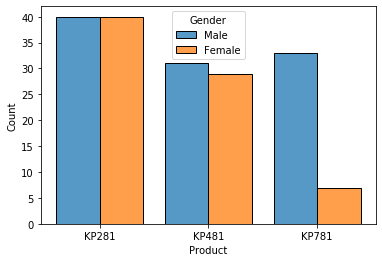

In [47]:
sns.histplot(data=aero, x='Product', hue='Gender', multiple='dodge', shrink=.8)

From above Crosstab and Graph:

    We can observe that same number of people from different Genders bought product `KP281`.
    But the number of Females who bought the product `KP781` is far less than the number of Males who bought the product.

**Product V/s Education**

In [48]:
pd.crosstab(aero['Product'],aero['Education'])

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,2,3,30,4,39,2,0,0
KP481,1,2,23,1,31,2,0,0
KP781,0,0,2,0,15,19,1,3


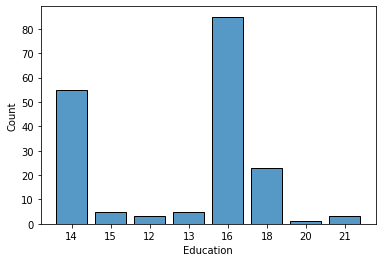

In [49]:
sns.histplot(data=aero, x='Education', shrink=.8)
plt.show()

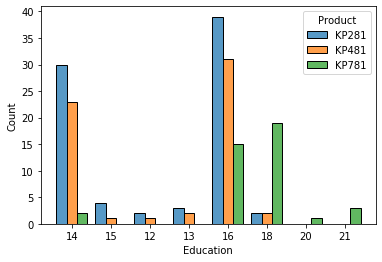

In [50]:
sns.histplot(data=aero, x='Education', hue='Product', multiple='dodge', shrink=.8)
plt.show()

From above Graph and crosstab:

    We can see that more number of people who have sixteen years of education are buying more products and of them product `KP281` is more frequently brought.
    The least bought product is `KP781` and is brought only by people have education of years<=20
    We can also see that people who have education of years<=13 also buys less products and they are only buying products `KP281` and `KP481`

**Product V/s MaritalStatus**

In [51]:
pd.crosstab(aero['Product'], aero['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [78]:
pd.crosstab(aero['Product'], aero['MaritalStatus'],normalize=True)

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


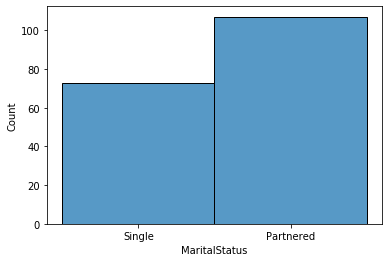

In [52]:
sns.histplot(data=aero, x='MaritalStatus')
plt.show()

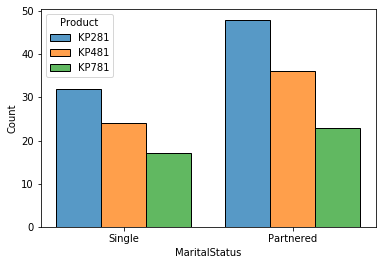

In [53]:
sns.histplot(data=aero, x='MaritalStatus', hue='Product', multiple='dodge', shrink=.8)
plt.show()

From above we can say that:

    We have more amount of people who are Partenered as buyers when compared to Singles.
    It is also same in case of every Product.

**Product V/s Usage:**

In [54]:
pd.crosstab(aero['Product'], aero['Usage'])

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


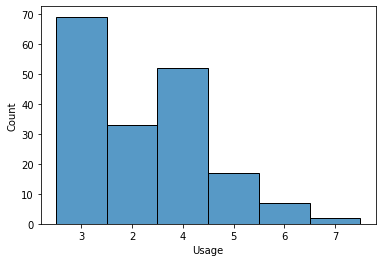

In [55]:
sns.histplot(data=aero, x='Usage')
plt.show()

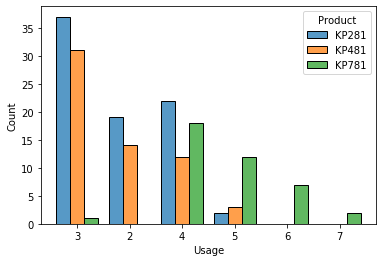

In [56]:
sns.histplot(data=aero, x='Usage', hue='Product', multiple='dodge', shrink=.8)
plt.show()

From above we can say that:

    We have more number of Buyers who does workout day after day.
    There are least amount of people who does workout nearly 6 days or 7 days a week.
    But we can also see that as the Usage increases the people who buy product `KP781` also increaes and they are the products bought my customers in max compared to other products when the usage<=5
    Eg: When Usage=5, Buyers for product `KP781` is 12 which is greator than number of buyers for other Products.
        Similar case when usage is 6 or 7.

**Product V/s Fitness**

In [57]:
pd.crosstab(aero['Product'], aero['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


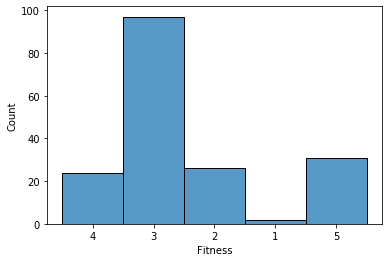

In [58]:
sns.histplot(data=aero, x='Fitness')
plt.show()

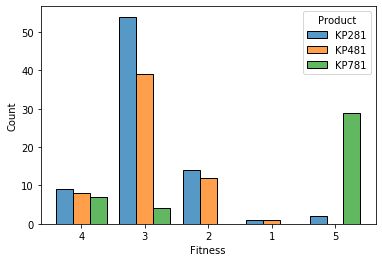

In [59]:
sns.histplot(data=aero, x='Fitness', hue='Product', multiple='dodge', shrink=.8)
plt.show()

From above Graph we can see that:

    The more numbers of Buyers have a Moderate Fitness.
    As Fitness increases Buyers are selecting product `KP781` and it increasing.

**Product V/s Income**

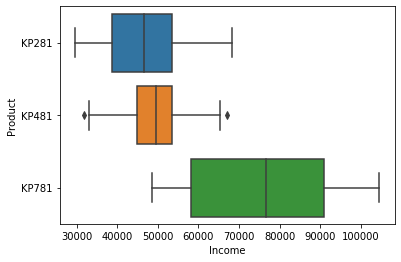

In [60]:
sns.boxplot(data=aero, x='Income', y='Product')
plt.show()

From above we can see that:

    There are no outliers for Products `KP281` and `KP781`.
    There are two outliers for Product `KP481`.

**Product V/s Miles**

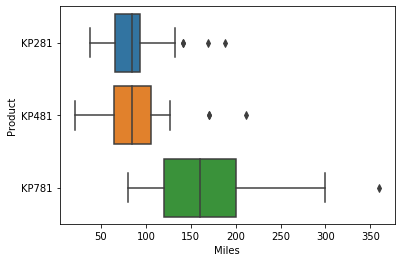

In [61]:
sns.boxplot(data=aero, x='Miles', y='Product')
plt.show()

From above we can see that:

    There are 3 outliers for Product `KP281`.
    There are 2 outliers for Product `KP481`.
    There is 1 outlier for Product `KP781`.

**Gender V/S Education**

In [74]:
pd.crosstab(aero['Education'], aero['Gender'])

Gender,Female,Male
Education,,
12,0,3
13,1,4
14,30,25
15,2,3
16,35,50
18,7,16
20,0,1
21,1,2


In [75]:
pd.crosstab(aero['Education'], aero['Gender'],normalize=True)

Gender,Female,Male
Education,,
12,0.000000,0.016667
13,0.005556,0.022222
14,0.166667,0.138889
15,0.011111,0.016667
16,0.194444,0.277778
18,0.038889,0.088889
20,0.000000,0.005556
21,0.005556,0.011111


In [77]:
pd.crosstab(aero['Gender'], aero['Education'])

Education,12,13,14,15,16,18,20,21
Gender,,,,,,,,
Female,0,1,30,2,35,7,0,1
Male,3,4,25,3,50,16,1,2


In [76]:
pd.crosstab(aero['Gender'], aero['Education'], normalize=True)

Education,12,13,14,15,16,18,20,21
Gender,,,,,,,,
Female,0.000000,0.005556,0.166667,0.011111,0.194444,0.038889,0.000000,0.005556
Male,0.016667,0.022222,0.138889,0.016667,0.277778,0.088889,0.005556,0.011111


From above data we can see that:

    More number of People has completed either `16 Years Of Education` followed by `14 Years Of Education`.

**Heatmap**

In [62]:
aero.corr()

,Age,Income,Miles
Age,1.000000,0.513414,0.036618
Income,0.513414,1.000000,0.543473
Miles,0.036618,0.543473,1.000000


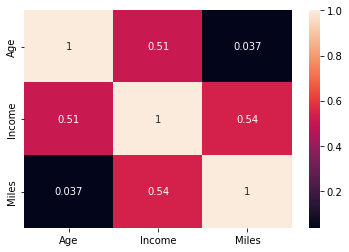

In [63]:
sns.heatmap(aero.corr(),annot=True)
plt.show()

From above we can see that:

    `Income` has relationship with both `Age` and `Miles`.
    `Age` and `Miles` are independent to each other.

**PairPlot**

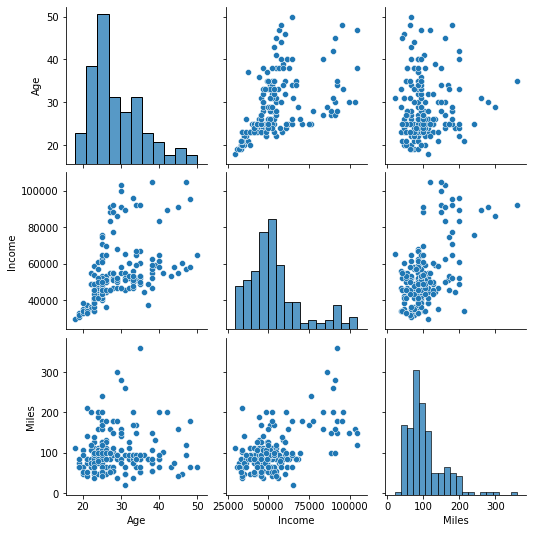

In [79]:
sns.pairplot(aero)
plt.show()

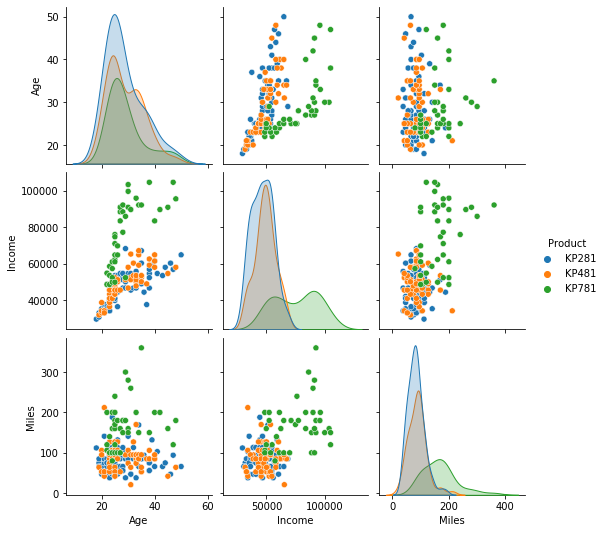

In [64]:
sns.pairplot(aero, hue='Product')
plt.show()

**Gender V/s Marital Status and Product**

In [84]:
pd.crosstab(aero['Gender'], [aero['MaritalStatus'],aero['Product']])

MaritalStatus Partnered             Single            
Product           KP281 KP481 KP781  KP281 KP481 KP781
Gender                                                
Female               27    15     4     13    14     3
Male                 21    21    19     19    10    14

In [85]:
pd.crosstab(aero['Gender'], [aero['MaritalStatus'],aero['Product']], normalize=True)

MaritalStatus Partnered                        Single                    
Product           KP281     KP481     KP781     KP281     KP481     KP781
Gender                                                                   
Female         0.150000  0.083333  0.022222  0.072222  0.077778  0.016667
Male           0.116667  0.116667  0.105556  0.105556  0.055556  0.077778

From Above we can see that:

    The Number of Males who are Partnered and bought product `KP481` is almost double to the number of Males who are single and purchased product `KP481`.
    Low sales of Product `KP481` may be due to this.

Insights:
        
    1. The people who are buying the Product depends on Age, Usage, Income, Gender, Miles, Fitness etc..,
    2. The People who uses the product Daily mostly buys Product `KP781`.
    3. Mostly Men prefer product `KP781` when compared to women who prefer `KP281`.
    4. Product Prefernce for men is in the following order: `KP781`, `KP281`, `KP481`.
    5. Product Preference for Women is in the following order: `KP281`, `KP481`, `KP781`.
    6. Men with higher income tend to buy product `KP781`.
    7. Chance of Buying product `KP281` and `KP481` is same among Partenered Male.
    8. Chance of Buying product `KP481` is less among Single Male when compared to other products.
    9. The Partnered Female has more chance of buying the product when compared to single Female.
    10. Chance of Buying product `KP281` is highest among Partnered Female.
    11. Chance of Buying product `KP481` is high among Single Female.
    12. Income has relationship with both `Age` and `Miles`.
    13. `Age` and `Miles` are independent to each other.

**Recommendations:**

    1. Based on Above data, if a person is Male has High Income and uses Product Regularly, it is better to recommend product `KP781` as Males with High Income and High Usage tends to buy it more when compared to other Products.
    2. The Product `KP481` is Better recommended For A Male who is Partnered and has High Income as the Probability of Males who are partnered buying products `KP281` and `KP481` is Same.
    3. If a Persons usage is high, it is better to recommend product `KP781`.
    4. If User is a Female, it is better to recommend product `KP281`.
    5. If User is Male, it is better to recommend product `KP781` if he is single.
    6. If User is Male, it is better to recommend product `KP481` or `KP281` if he is Partnered.
    7. If Miles<200, then it is better to recommend product `KP281` or product `KP481`
    8. If Miles>200, then it is better to recommend product `KP781`.
    9. If the Income<60K it is better to recommend product `KP281` and product `KP481`.
    10. If the Income>60K it is better to recommend product `KP781` and product `KP481`.